In [188]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

In [189]:
df = pd.read_csv('Ice_cream selling data.csv')
df.head() 

,Temperature (°C),Ice Cream Sales (units)
0,-4.662263,41.842986
1,-4.316559,34.661120
2,-4.213985,39.383001
3,-3.949661,37.539845
4,-3.578554,32.284531


In [190]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Temperature (°C)         49 non-null     float64
 1   Ice Cream Sales (units)  49 non-null     float64
dtypes: float64(2)
memory usage: 916.0 bytes


In [191]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Temperature (°C),49.0,0.271755,2.697672,-4.662263,-2.111870,0.688781,2.784836,4.899032
Ice Cream Sales (units),49.0,15.905308,12.264682,0.328626,4.857988,12.615181,25.142082,41.842986


In [192]:
df.isnull().sum() 

Temperature (°C)           0
Ice Cream Sales (units)    0
dtype: int64

In [193]:
df.duplicated().sum() 

np.int64(0)

In [194]:
df.shape

(49, 2)

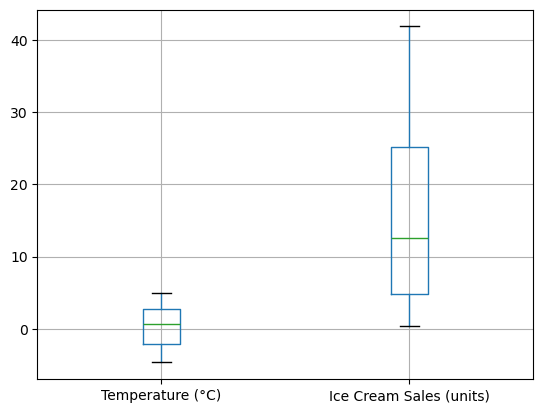

In [195]:
df.boxplot()
plt.show() 

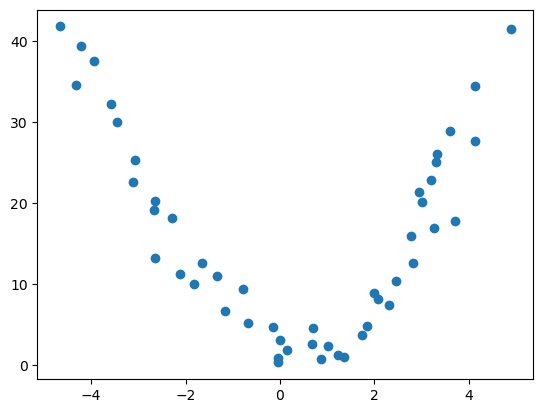

In [196]:
plt.scatter(x=df['Temperature (°C)'], y=df['Ice Cream Sales (units)'])
plt.show() 

In [197]:
x = df[['Temperature (°C)']]
y = df['Ice Cream Sales (units)']

In [198]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) 

In [199]:
from sklearn.linear_model import LinearRegression 
model = LinearRegression() 

In [200]:

model.fit(x_train,y_train) 
model 

LinearRegression()

In [201]:
y_pred = model.predict(x_test)


In [202]:
from sklearn.metrics import r2_score, mean_squared_error

mse = mean_squared_error( y_test,y_pred)
r2 = r2_score( y_test, y_pred)
print(r2)
print(mse)

-0.5751270190188227
149.32629119325185


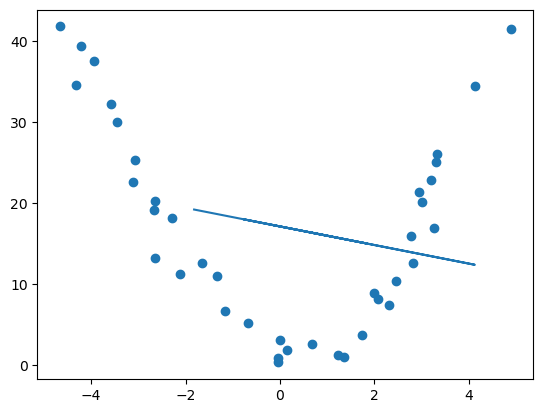

In [203]:
plt.plot(x_test, y_pred)
plt.scatter(x_train, y_train)
plt.show() 

In [204]:
from sklearn.preprocessing import PolynomialFeatures

In [205]:
poly = PolynomialFeatures(degree=2, include_bias=True)

x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

In [206]:
model2 = LinearRegression() 
model2.fit(x_train_poly, y_train)

LinearRegression()

In [207]:
y_pred2 = model2.predict(x_test_poly)


In [208]:
mse2 = mean_squared_error(y_test, y_pred2)
r22 = r2_score(y_test, y_pred2)

print(f"The R2 of the model is:{r22*100}\n The MSE of the model is:{mse2}")

The R2 of the model is:84.30551371938841
 The MSE of the model is:14.878796440981471


In [209]:
x_grid = np.linspace(x.min(), x.max(), 49).reshape(-1,1)
x_grid_poly = poly.transform(x_grid) 
y_grid_poly = model2.predict(x_grid_poly)



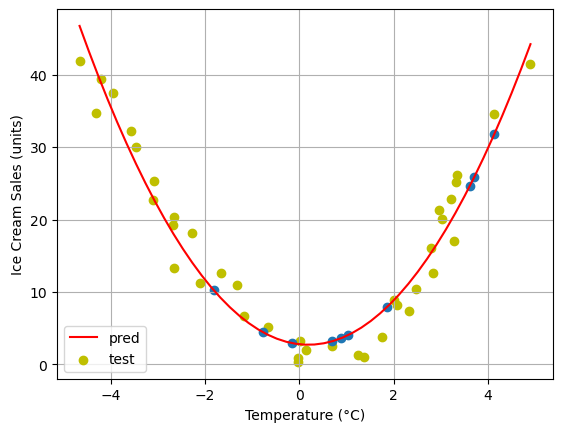

In [210]:
plt.plot(x_grid, y_grid_poly, color='r', label='pred')
plt.scatter(x_train, y_train, color='y', label='test')
plt.scatter(x_test, y_pred2)
plt.xlabel("Temperature (°C)")
plt.ylabel("Ice Cream Sales (units)")
plt.legend()
plt.grid()
plt.show() 

In [211]:


new_data = [[10]]  # Temperature = 10°C
tempreature = new_data[0][0]
new_data_poly = poly.transform(new_data)

prediction = model2.predict(new_data_poly)
print(f"The total amount of ice cream that will be sold when the temperature is {tempreature} is approximately {prediction[0]:.0f} units.")


The total amount of ice cream that will be sold when the temperature is 10 is approximately 183 units.


In [212]:

import joblib 

joblib.dump(model2, 'poly_model.pkl')


['poly_model.pkl']

In [214]:
import os
import joblib
from sklearn.preprocessing import PolynomialFeatures

BASE_DIR = os.getcwd()  # Current working directory
POLY_PATH = os.path.join(BASE_DIR, 'poly_transformer.pkl')

# Suppose x_train is your training feature(s)
poly = PolynomialFeatures(degree=2, include_bias=True)
poly.fit(x_train)

joblib.dump(poly, POLY_PATH)
print("✅ Polynomial transformer saved at:", POLY_PATH)


✅ Polynomial transformer saved at: /Users/awabe/Documents/ML foundation to Advance/Certisured course/Machine Learning/Projects for GITHUB/Polynomial Regression/poly_transformer.pkl


In [217]:
import os

# Make sure the static folder exists
os.makedirs(os.path.dirname(PLOT_PATH), exist_ok=True)

# Then save the plot
plt.savefig(PLOT_PATH)
plt.close()
print(f"✅ Plot saved to {PLOT_PATH}")


✅ Plot saved to /Users/awabe/Documents/ML foundation to Advance/Certisured course/Machine Learning/Projects for GITHUB/Polynomial Regression/static/pred_plot.png


In [218]:
import matplotlib.pyplot as plt
import numpy as np

PLOT_PATH = os.path.join(BASE_DIR, 'static', 'pred_plot.png')

# Create a grid of X values
x_grid = np.linspace(x.min(), x.max(), 100).reshape(-1,1)
x_grid_poly = poly.transform(x_grid)

# Predict with your polynomial model
y_grid_pred = model2.predict(x_grid_poly)

# Plot
plt.figure(figsize=(8,5))
plt.plot(x_grid, y_grid_pred, color='r', label='Polynomial Regression')
plt.scatter(x_train, y_train, color='b', label='Training data')
plt.scatter(x_test, y_test, color='g', label='Test data')
plt.xlabel("Temperature (°C)")
plt.ylabel("Ice Cream Sales (units)")
plt.title("Polynomial Regression Fit")
plt.legend()
plt.grid(True)

# Save to static folder
plt.savefig(PLOT_PATH)
plt.close()
print(f"✅ Plot saved to {PLOT_PATH}")


✅ Plot saved to /Users/awabe/Documents/ML foundation to Advance/Certisured course/Machine Learning/Projects for GITHUB/Polynomial Regression/static/pred_plot.png
